# Portfolio Strategy based on Kelly Criterion

In this educational notebook, you will learn how to create a kelly portfolio. The process for doing that is as follows:
1. Import the libraries and data 
2. Calculate the daily returns
3. Create the Kelly criterion
4. Create the kelly portfolio

## Import the libraries and data

#### Import the libraries

You will need: <br>
- `numpy` library for performing mathematical calculation. <br>
- `pandas` library for storing the stock price data  <br> 
- `matplotlib` library is needed for visualising the data. <br>
- `cvxpy` library is used to optimise the kelly criterion and get the best weight combination. <br>
- `pandas.plotting` is needed to avoid any warnings that may be thrown while plotting the pandas data using matplotlib.


In [2]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cvxpy as cp 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Import the data

You can read the stock data for companies Chervron (ticker: CVX) and IBM (ticker: IBM), using a csv file. This 
data contains the close prices for the stocks starting from January-2011 to March-2017. This CSV file can download from the data folder


In [16]:
# Read the data from a csv file and specify the first column 'date' as the index
df = pd.read_csv('data/Stock_Prices_2011_To_2017_Kelly_Portfolio.csv', index_col=[0])

# Convert the date columns to datetime format
df.index = pd.to_datetime(df.index,format="%d-%m-%Y")

In [17]:
df.head()

,CVX,IBM
date,,
2011-01-03,71.663479,122.660475
2011-01-04,71.398463,122.793548
2011-01-05,71.273750,122.302840
2011-01-06,70.689155,123.641892
2011-01-07,71.078885,123.034744


## Calculate the daily returns

While optimizing the Kelly Criterion, you multiply the daily returns of the stocks with thier corresponding weights to 
get the returns of the portfolio. For the first step towards calculating the Kelly Criterion, you will create a dataframe 
that will contain the daily percentage change of each of the stocks.

In [19]:
# Calculate the daily percentage of both stocks
df_change = df.pct_change()

In [20]:
# Print the top 5 rows of the dataframe
df_change.head()

,CVX,IBM
date,,
2011-01-03,NaN,NaN
2011-01-04,-0.003698,0.001085
2011-01-05,-0.001747,-0.003996
2011-01-06,-0.008202,0.010949
2011-01-07,0.005513,-0.004911


In [21]:
# Drop the first row containing the null values
df_change.dropna(inplace=True)

# Calculate the cumulative percentage returns of each stocks
df_cumulative_returns = (df_change + 1).cumprod()*100

In [22]:
# Print the top 5 rows of the dataframe
df_cumulative_returns.head()

,CVX,IBM
date,,
2011-01-04,99.630194,100.108489
2011-01-05,99.456167,99.708435
2011-01-06,98.640418,100.800109
2011-01-07,99.184251,100.305126
2011-01-10,98.335871,100.108489


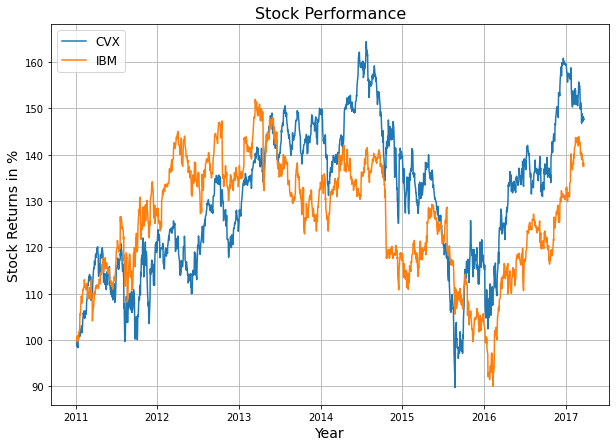

In [28]:
# Plot the returns of both the stocks 
plt.figure(figsize=(10,7))
i = 0
for column in df_cumulative_returns.columns:
    plt.plot(df_change.index, df_cumulative_returns[column], label=column)

plt.legend(loc='best', fontsize=12)
plt.title('Stock Performance', fontsize=16)
plt.ylabel('Stock Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid()
plt.show()